# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Observations:
#1. Temperature is higher from -20 to 20 latitude, it's kind of like a top of a parabola curve from the graph.
#2. I've run the script several times and there's always a place with super high humidity, like above 250. It turns out to be a 
#   place called Talara in Peru.
#3  Only temperature seems to be closely related to latitude. Humidity, cloudiness and wind speed doesn't seem to have much
#   correlation with latitude.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
today = date.today()

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

In [4]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# query_url = f"{url}appid={api_key}&units={units}&q="
# city='Beijing'
# response = requests.get(query_url + city).json()
# print(response)
# print(response['name'])

In [5]:
# print(response['name'])
# print(response['coord']['lat'])
# print(response['coord']['lon'])
# print(response['main']['temp_max'])
# print(response['main']['humidity'])
# print(response['clouds']['all'])
# print(response['wind']['speed'])
# print(response['dt'])
# print(response['sys']['country'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
cities2=[]
lat=[]
lng=[]
temp = []
humi=[]
cloud=[]
wind=[]
date=[]
country=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cities2.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humi.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df=pd.DataFrame({'City':cities2,
                 'Cloudiness':cloud,
                 'Country':country,
                 'Date':date,
                 'Humidity':humi,
                 'Lat':lat,
                 'Lng':lng,                 
                 'Max Temp':temp,
                 'Wind Speed':wind})

In [8]:
df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

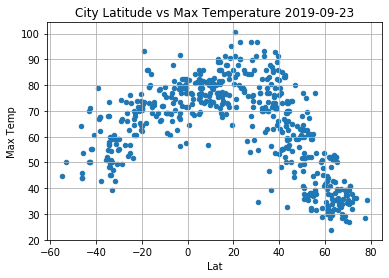

In [9]:
plot1=df.plot.scatter(x='Lat',y='Max Temp')
plot1.grid()
plt.savefig("Images/Fig1.png")
plt.title(f"City Latitude vs Max Temperature {today}");

#### Latitude vs. Humidity Plot

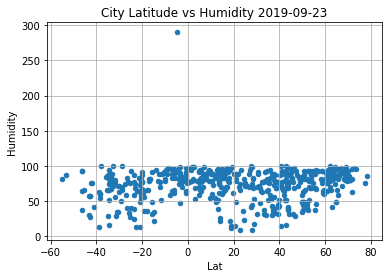

In [10]:
plot2=df.plot.scatter(x='Lat',y='Humidity')
plot2.grid()
plt.savefig("Images/Fig2.png")
plt.title(f"City Latitude vs Humidity {today}");

#### Latitude vs. Cloudiness Plot

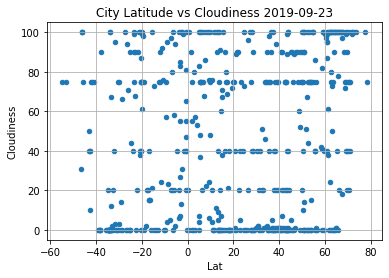

In [11]:
plot3=df.plot.scatter(x='Lat',y='Cloudiness')
plot3.grid()
plt.savefig("Images/Fig3.png")
plt.title(f"City Latitude vs Cloudiness {today}");

#### Latitude vs. Wind Speed Plot

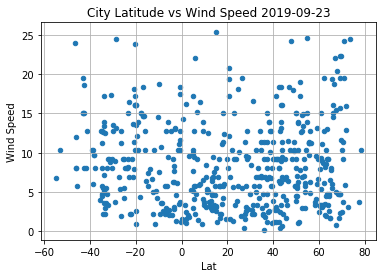

In [12]:
plot4=df.plot.scatter(x='Lat',y='Wind Speed')
plot4.grid()
plt.savefig("Images/Fig4.png")
plt.title(f"City Latitude vs Wind Speed {today}");

In [13]:
df.loc[df['Humidity']>250,'City']

86    Talara
Name: City, dtype: object